# Iris Classification Project

In [265]:
import sklearn as sk
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

np.random.seed(42)
%matplotlib inline

## 1. Dataset Loading and Preprocessing

In [266]:
import pandas as pd

url = 'https://github.com/finartix/data-science-assignment/blob/main/iris.data?raw=true'
columns = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'species'
]
iris_df = pd.read_csv(url, names=columns)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


* First we handle the missing values by removing all rows with NULL values from the DataFrame.

In [267]:
iris_df=iris_df.dropna()
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The `species` variable is categorical so we encode it.
* Iris-setosa -> 0
* Iris-versicolor -> 1
* Iris-virginica -> 2

In [268]:
iris_df['species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [269]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
iris_df['species']= label_encoder.fit_transform(iris_df['species'])  

iris_df['species'].unique() 

array([0, 1, 2])

## 2. Visualize the Dataset

* Below we create some plots to visualize the dataset and understand its characteristics.

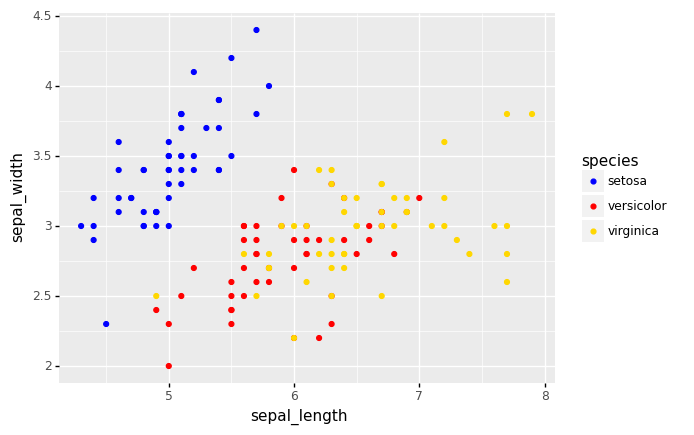

<ggplot: (8768145243498)>

In [270]:
ggplot(data=iris_df) +\
    geom_point(aes(x='sepal_length', y='sepal_width', 
                   color='factor(species)')) +\
    labs(color='species') +\
    scale_color_manual(labels=['setosa', 'versicolor', 'virginica'], 
                       values = ["blue", "red", 'gold'])

* We can see that with the `petal` variables the segmentation of species is more distinct, so we will use them for our predictions.

<Figure size 1080x576 with 0 Axes>

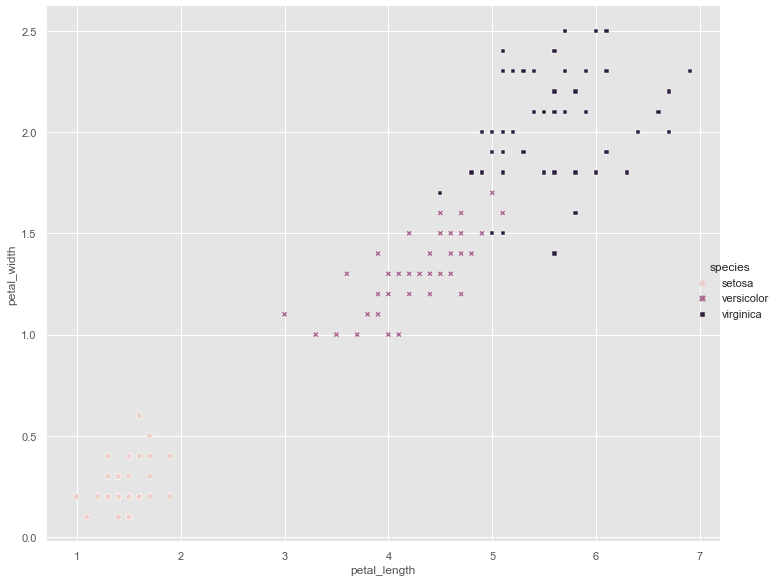

In [271]:
import seaborn as sns
a4_dims = (11.7, 8.27)
plt.figure(figsize=(15,8))
g=sns.relplot(x="petal_length", y="petal_width", hue="species", style="species",  data=iris_df, 
              facet_kws={'legend_out': True}, height = 8, aspect = 1.25)

new_labels = ['setosa', 'versicolor', 'virginica']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

* We'll need to shuffle the data, to improve model learning.

In [272]:
iris_df = iris_df.sample(frac=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,1
107,7.3,2.9,6.3,1.8,2
14,5.8,4.0,1.2,0.2,0
93,5.0,2.3,3.3,1.0,1


 * As depicted below, the scale of `petal_length` is almost three times that of `petal_width`.
 
 * This may influence the behaviour of our machine learning method, so we have to rescale them.

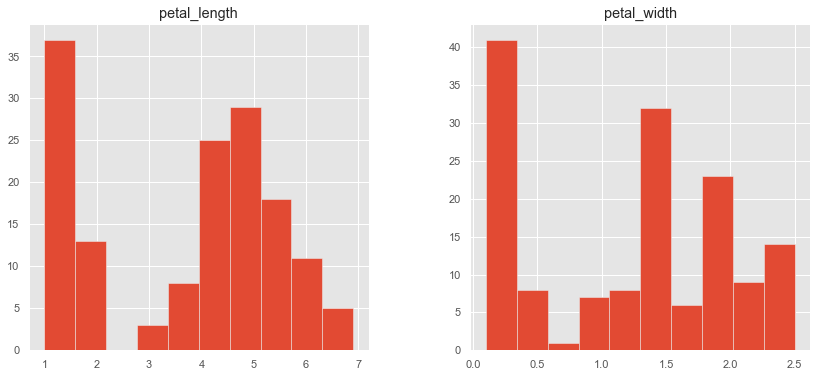

In [273]:
plt.style.use('ggplot') 
_ = iris_df[['petal_length', 'petal_width']].hist(bins=10, figsize=(14, 6))

## 3. Train a Classifier

* This can be easily done using StandardScaler.

* `StandardScaler` scales the data so that they have mean 0 and variance equal to 1.

In [274]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df[['petal_length', 'petal_width']])
iris_df[['petal_length', 'petal_width']] = scaler.transform(iris_df[['petal_length', 'petal_width']])

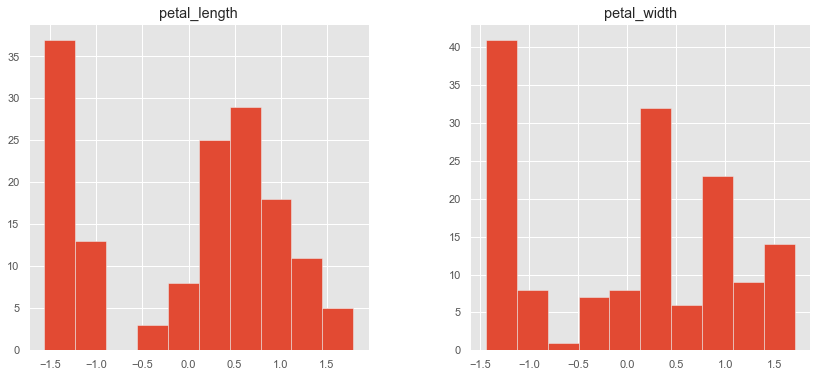

In [275]:
_ = iris_df[['petal_length', 'petal_width']].hist(bins=10, figsize=(14, 6))

* We can, now, build our classifier.
* To carry out the classification we will use the SGDClassifier.

* SGD stands for Stochastic Gradient Descent. This is a numerical procedure to find the minimum of a function.

* In our case it will find the minimum of the loss function, which measures how far every data instance is from the classification boundary.

* Firstly, we will not use all our training data set to fit the classifier.

* We would use a part of it for training, and a part of it to evaluate our classifier, so we do a split in training and testing dataset (80%/20%).

In [276]:
from sklearn.model_selection import train_test_split

# Get dataset with only the first two attributes
X, y = (iris_df[['petal_length', 'petal_width']].values, 
        iris_df['species'].values)

# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=13)

print(X_train.shape, y_train.shape)

(119, 2) (119,)


* Now we can train the classifier on the training set.
* The hyperparameter alpha is the multiplier of the regularisation term; the higher it is, the stronger the regularization and the more the model parameters shrink to zero.

* The hyperparameter tol determines how small the changes in the loss will have to be for a number of consecutive iterations (given by the hyperparameter n_iter_no_change, by default 5), in order for training to stop.

* The hyperparameter max_iter gives the maximum number of iterations (regardless of the stopping criterion).

In [277]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.001, max_iter=1e5, tol=-np.inf, random_state=13)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=100000.0, random_state=13, tol=-inf)

* The resulf of the classification is in the clf object.

* Since we are trying to classify three classes, the clf object contains the information for the three lines that divide our data instances.

## 4. Evaluate the Model

* We can plot the lines and see if they correspond to good decision boundaries.

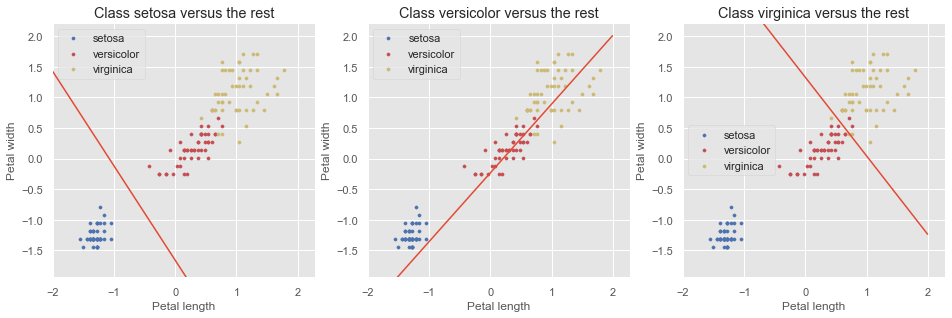

In [278]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5 # petal length
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5 # petal width
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(16, 10)
colors = "bry"

for i in clf.classes_:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ iris.target_names[i] + ' versus the rest')
    axes[i].set_xlabel('Petal length')
    axes[i].set_ylabel('Petal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    for j, color in zip(clf.classes_, colors):
        idx = np.where(y == j)
        axes[i].scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[j],
                        cmap=plt.cm.Paired, s=10)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    axes[i].plot(xs, ys)
    axes[i].legend()

As we can observe, the line that seperates the `versicolor` species from the rest is not good, in contrast with the lines for `setosa` and `virginica` that does it almost perfectly.

* To further evaluate our model we calculate the accuracy metric: the proportion of instances correctly classified by the classifier.

In [279]:
from sklearn import metrics

y_train_pred = clf.predict(X_train)
metrics.accuracy_score(y_train, y_train_pred)

0.9747899159663865

* Actually, we must not measure the performance of the classifier on the training data, but on unseen data, that's why we split earlier our dataset.

In [280]:
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8333333333333334

* The performance with the test data is lower, as expected, but still very good.

* The most popular evaluation functions in scikit-learn are: accuracy, precision, recall, and F1 score.

In [281]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.93      1.00      0.96        13
  versicolor       0.83      0.56      0.67         9
   virginica       0.70      0.88      0.78         8

    accuracy                           0.83        30
   macro avg       0.82      0.81      0.80        30
weighted avg       0.84      0.83      0.82        30



* Below, we can see the confusion matrix, in which each cell  (𝑖,𝑗) contains the number of instances of class  𝑖
  that were predicted to be in class  𝑗


In [282]:
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 1,  5,  3],
       [ 0,  1,  7]])

* Most of the wrong classifications came from the `versicolor` species, as expected since the line does not separate good enough.

## 5. Store the Metric

* Finally, we store our metrics in a csv file, so we can access them through a Flask Web App.

In [283]:
report_dict = metrics.classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict)
df_report

,0,1,2,accuracy,macro avg,weighted avg
precision,0.928571,0.833333,0.700000,0.833333,0.820635,0.839048
recall,1.000000,0.555556,0.875000,0.833333,0.810185,0.833333
f1-score,0.962963,0.666667,0.777778,0.833333,0.802469,0.824691
support,13.000000,9.000000,8.000000,0.833333,30.000000,30.000000


In [284]:
df_report = df_report.rename(columns={'0': 'setosa', '1': 'versicolor', '2': 'virginica'})
df_report

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,0.928571,0.833333,0.700000,0.833333,0.820635,0.839048
recall,1.000000,0.555556,0.875000,0.833333,0.810185,0.833333
f1-score,0.962963,0.666667,0.777778,0.833333,0.802469,0.824691
support,13.000000,9.000000,8.000000,0.833333,30.000000,30.000000


In [285]:
df_report.to_csv('report_data.csv', index=True)